In [5]:
import glob
import os

import pandas as pd
import seaborn as sns
%matplotlib inline

# Don't care about too many plots open
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

import warnings


import sourmash_utils

import common

figure_folder = common.get_figure_folder()
!mkdir -p figure_folder
figure_folder

'../figures/075_visualize_knn_graph_on_similarities'

In [8]:
! aws s3 ls s3://olgabot-maca/10x/

                           PRE sourmash_categorize/
                           PRE sourmash_compare/
                           PRE sourmash_compute/


In [9]:
! aws s3 ls s3://olgabot-maca/10x/sourmash_categorize/

                           PRE 10X_P7_8/


In [6]:
! aws s3 ls s3://olgabot-maca/10x/sourmash_compare/

                           PRE 10X_P7_8/
                           PRE bladder_and_lung/


Damn I didn't save the `10X_P4_3` within-channel comparisons to s3... will have to re-calculate

In [7]:
! aws s3 ls s3://olgabot-maca/10x/sourmash_compute/

                           PRE 10X_P4_3/
                           PRE 10X_P7_8/
                           PRE bladder_and_lung/


In [10]:
! aws s3 ls s3://olgabot-maca/10x/sourmash_compute/10X_P4_3/

                           PRE scaled=0_num_hashes=10000/
                           PRE scaled=1000_num_hashes=0/


In [11]:
! aws s3 ls s3://olgabot-maca/10x/sourmash_compute/10X_P4_3/scaled=0_num_hashes=10000/

2018-11-03 17:22:45  237638698 possorted_genome_bam.sig


In [5]:
! aws s3 ls s3://olgabot-maca/10x/sourmash_compare/bladder_and_lung/

                           PRE 10X_P7_8/
2018-11-03 17:24:51   12091912 bladder_and_lung_dna_ksize=21.csv
2018-11-03 17:24:51   11844476 bladder_and_lung_dna_ksize=21_ignore_abundance=False.csv
2018-11-03 17:24:51   12091912 bladder_and_lung_dna_ksize=21_ignore_abundance=True.csv
2018-11-03 17:24:51   12178102 bladder_and_lung_dna_ksize=27.csv
2018-11-03 17:24:51   11915571 bladder_and_lung_dna_ksize=27_ignore_abundance=False.csv
2018-11-03 17:24:51   12178102 bladder_and_lung_dna_ksize=27_ignore_abundance=True.csv
2018-11-03 17:24:51   12203510 bladder_and_lung_dna_ksize=33.csv
2018-11-03 17:24:51   11939705 bladder_and_lung_dna_ksize=33_ignore_abundance=False.csv
2018-11-03 17:24:51   12203510 bladder_and_lung_dna_ksize=33_ignore_abundance=True.csv
2018-11-03 17:24:51   12273574 bladder_and_lung_dna_ksize=51.csv
2018-11-03 17:24:51   11825018 bladder_and_lung_dna_ksize=51_ignore_abundance=False.csv
2018-11-03 17:24:51   12273574 bladder_and_lung_dna_ksize=51_ignore_abundance=True.csv

In [2]:
prefix = '/mnt/data/10X_P4_3/sourmash_compare/'
basename = 'possorted_genome_bam__k27_dna_ignore-abundance=True.csv'
csv = f'{prefix}{basename}'

bladder_dna_k27_ignore, bladder_dna_k27_ignore_metadata = sourmash_utils.read_compare(csv)
print('bladder_dna_k27_ignore.shape', bladder_dna_k27_ignore.shape)
print('bladder_dna_k27_ignore_metadata.shape', bladder_dna_k27_ignore_metadata.shape)
bladder_dna_k27_ignore_metadata.head()

FileNotFoundError: File b'/mnt/data/10X_P4_3/sourmash_compare/possorted_genome_bam__k27_dna_ignore-abundance=True.csv' does not exist

In [ ]:
bladder_dna_k27_ignore.head()

In [ ]:
bladder_dna_k27_ignore_masked = bladder_dna_k27_ignore[bladder_dna_k27_ignore < 1]
bladder_dna_k27_ignore_masked = bladder_dna_k27_ignore_masked.fillna(0)
bladder_dna_k27_ignore_masked.head()

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
# Convert to distances by subtracting from 1
X = 1 - bladder_dna_k27_ignore_masked

# Set self-distance to be largest
# X[X == 0] = 100
X.head()

In [ ]:
nbrs = NearestNeighbors(n_neighbors=5, metric='precomputed').fit(X)
nbrs

In [ ]:
distances, indices = nbrs.kneighbors(X)

In [ ]:
colors = sourmash_utils.category_colors(bladder_dna_k27_ignore_metadata['cell_ontology_class'], 
                               palette='tab10')

In [ ]:
bladder_dna_k27_ignore_metadata['cell_ontology_class_color'] = colors
bladder_dna_k27_ignore_metadata.head()

In [ ]:
import networkx as nx

G = nx.Graph()
G

bladder_dna_k27_ignore_metadata_reset = bladder_dna_k27_ignore_metadata.reset_index()
bladder_dna_k27_ignore_metadata_reset = bladder_dna_k27_ignore_metadata_reset.rename(
    columns={'cell_id': 'label'})
bladder_dna_k27_ignore_metadata_reset.head()

In [ ]:
range(2)

In [ ]:
bladder_cell = sourmash_utils.get_single_cell(sourmash_utils.BLADDER_CELL_ID, bladder_dna_k27_ignore,
                              bladder_dna_k27_ignore_metadata, name='bladder_dna_k27_ignore',
                              ksize=27, ignore_abundance=True)
bladder_cell.head(10)

In [ ]:
import networkx as nx

G = nx.Graph()
G

# bladder_dna_k27_ignore_metadata_reset = bladder_dna_k27_ignore_metadatare

nodes = [(cell_id, attr.to_dict()) for cell_id, attr in bladder_dna_k27_ignore_metadata.iterrows()]

G.add_nodes_from(nodes)

In [ ]:
# for cell_id, attributes in nodes:
#     G.add_node(cell_id, **attributes)

In [ ]:
G.nodes['10X_P4_3_GAATAAGGTCGGCATC']

In [ ]:
neighbor_indices = pd.DataFrame(indices, index=X.index)
neighbor_indices = neighbor_indices.applymap(lambda x: X.index[x])
neighbor_indices.head()

In [ ]:
# distances

In [ ]:
neighbor_indices_tidy = neighbor_indices.unstack()
neighbor_indices_tidy = neighbor_indices_tidy.reset_index()
neighbor_indices_tidy = neighbor_indices_tidy.drop(columns='level_0')
neighbor_indices_tidy.head()

In [ ]:
neighbor_indices_tidy.head().values

In [ ]:
G.add_edges_from(neighbor_indices_tidy.values)

In [ ]:
G

In [ ]:
type(G.node_dict_factory)

In [ ]:
nx.draw(G, node_color=[d['cell_ontology_class_color'] for v, d in G.nodes(data=True)], 
                       pos=nx.spring_layout(G, seed=0), alpha=0.5)

In [ ]:
%%file knn.py
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from sklearn.neighbors import NearestNeighbors

import sourmash_utils


def _compute_neighbor_adjacencies(data, n_neighbors=5):
    # Convert to distances by subtracting from 1
    X = 1 - data
    nbrs = NearestNeighbors(n_neighbors=n_neighbors, metric='precomputed').fit(X)
    distances, indices = nbrs.kneighbors(X)
    
    # Replace integers with cell ids
    neighbor_indices = pd.DataFrame(indices, index=X.index)
    neighbor_indices = neighbor_indices.applymap(lambda x: X.index[x])
    
    # Make (cell_1, cell_2) adjacency list
    neighbor_indices_tidy = neighbor_indices.unstack()
    neighbor_indices_tidy = neighbor_indices_tidy.reset_index()
    neighbor_indices_tidy = neighbor_indices_tidy.drop(columns='level_0')
    return neighbor_indices_tidy.values


def add_color_cols(metadata, color_cols=['cell_ontology_class'], 
                           palettes=dict(cell_ontology_class='tab10')):
    """Add a hexadecimal color for the categorical values in color_cols"""
    for col in color_cols:
        palette = palettes[col]    
        colors = sourmash_utils.category_colors(metadata[col], 
                                   palette=palette)
        new_col = f'{col}_color'
        metadata[new_col] = colors
    return metadata


def nearest_neighbor_graph(data, metadata, n_neighbors=5, 
                           color_cols=['cell_ontology_class'], 
                           palettes=dict(cell_ontology_class='tab10')):
    metadata = add_color_cols(metadata, color_cols=color_cols, palettes=palettes)
    
    G = nx.Graph()
    nodes = [(cell_id, attr.to_dict()) for cell_id, attr in metadata.iterrows()]
    G.add_nodes_from(nodes)
    
    neighbor_adjacencies = _compute_neighbor_adjacencies(data, n_neighbors=n_neighbors)
    G.add_edges_from(neighbor_adjacencies)
    return G

def _add_legend(colors, labels, title):
    label_color_df = pd.DataFrame(dict(colors=colors, labels=labels))
    label_color_df = label_color_df.drop_duplicates()
    label_color_df = label_color_df.sort_values('labels')

    legend_elements = [Line2D([0], [0], color='w', marker='o', markersize=10,
                              markerfacecolor=color, label=label, alpha=0.5)
                       for i, (color, label) in label_color_df.iterrows()]

    ax = plt.gca()
    ax.legend(handles=legend_elements, title=title, frameon=False)
    return ax


def draw_graph(G, label_col='cell_ontology_class', edge_color='black', legend=True,
               **kwargs):
    label_color_col = f"{label_col}_color"

    colors = [d[label_color_col] for v, d in G.nodes(data=True)]
    labels = [d[label_col] for v, d in G.nodes(data=True)]
    
    if 'pos' not in kwargs:
        kwargs['pos'] = nx.spring_layout(G)
    nx.draw(G, node_color=colors, alpha=0.5, **kwargs)
    
    if legend:
        _add_legend(colors, labels, label_col)


In [ ]:
import knn

bladder_graph = knn.nearest_neighbor_graph(bladder_dna_k27_ignore, bladder_dna_k27_ignore_metadata)
bladder_graph

draw_graph(bladder_graph)

In [ ]:
%load_ext autoreload
%autoreload 2

In [19]:
import knn

In [20]:
! aws s3 ls s3://olgabot-maca/10x_vs_facs/sourmash_compare/

2018-10-24 17:26:19   33837270 tenx=Bladder-Lung_facs=Bladder-Lung_molecule=dna_ksize=27_ignore-abundance=True.csv
2018-10-24 18:45:12   33665414 tenx=Bladder-Lung_facs=Bladder-Lung_molecule=protein_ksize=27_ignore-abundance=True.csv
2018-10-19 10:41:44    1813690 tenx=Bladder_facs=Bladder_molecule=dna_ksize=27_ignore_abundance=False.csv
2018-10-18 18:10:27    1839267 tenx=Bladder_facs=Bladder_molecule=dna_ksize=27_ignore_abundance=True.csv
2018-10-18 17:53:47    1802709 tenx=Bladder_facs=Bladder_molecule=protein_ksize=27_ignore_abundance=False.csv
2018-10-18 17:55:12    1837171 tenx=Bladder_facs=Bladder_molecule=protein_ksize=27_ignore_abundance=True.csv
2018-10-18 18:16:51   11261633 tenx=Bladder_facs=Lung_molecule=dna_ksize=27_ignore_abundance=False.csv
2018-10-18 18:09:10   11503281 tenx=Bladder_facs=Lung_molecule=dna_ksize=27_ignore_abundance=True.csv
2018-10-18 18:50:12   11112583 tenx=Bladder_facs=Lung_molecule=protein_ksize=27_ignore_abundance=False.csv
2018-10-18 18:19:41   11

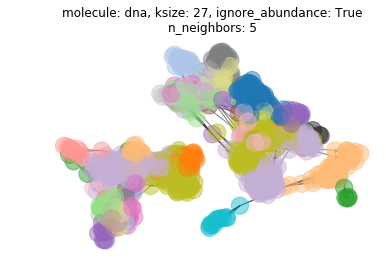

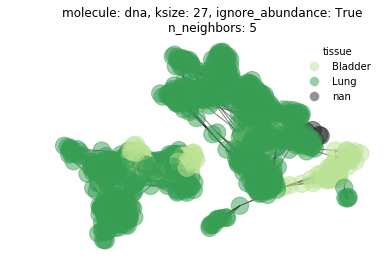

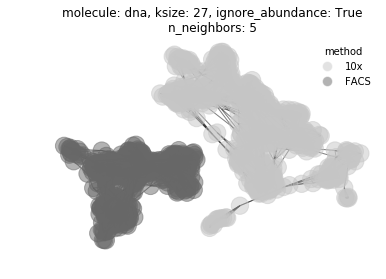

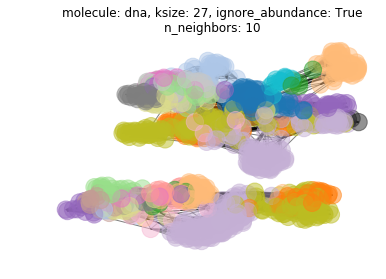

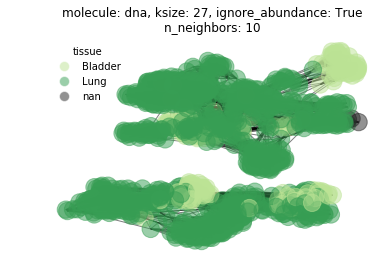

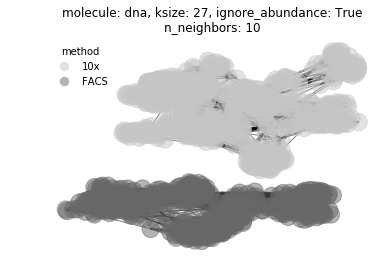

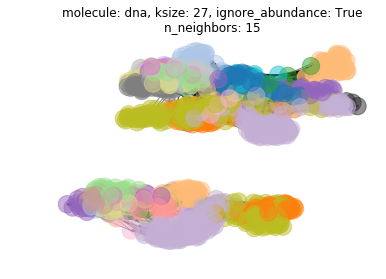

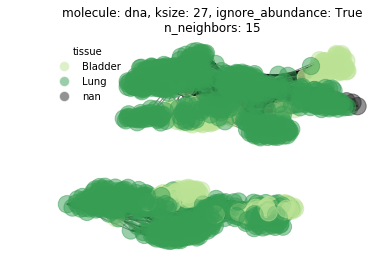

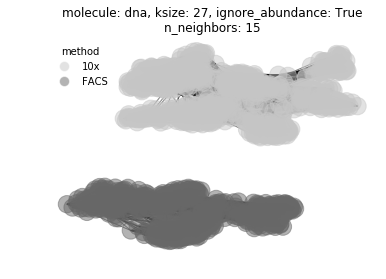

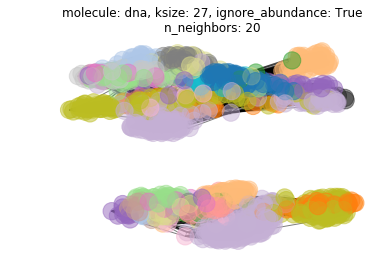

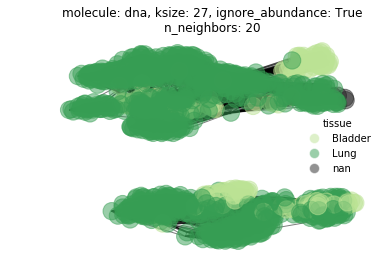

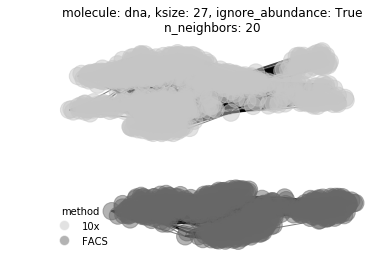

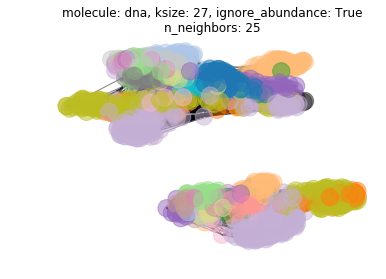

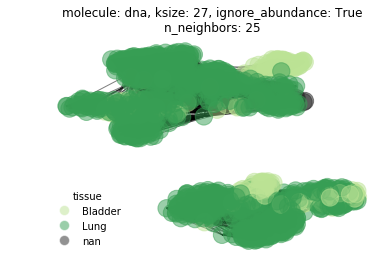

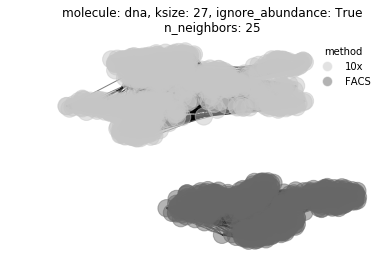

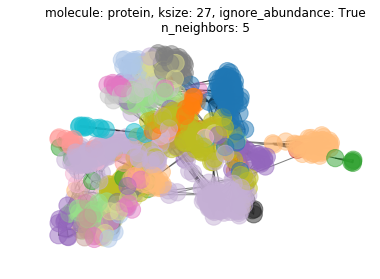

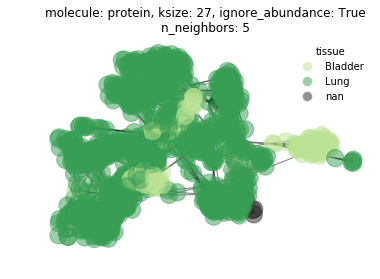

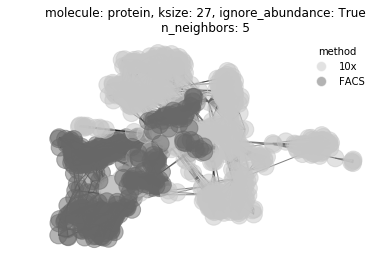

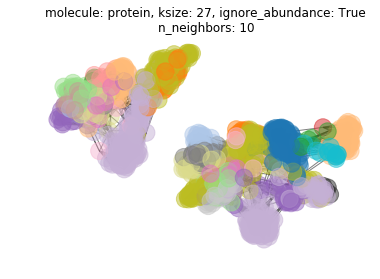

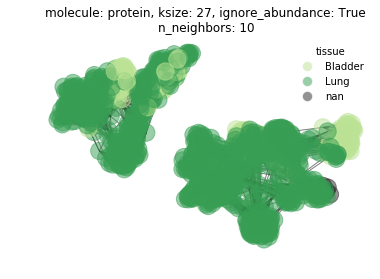

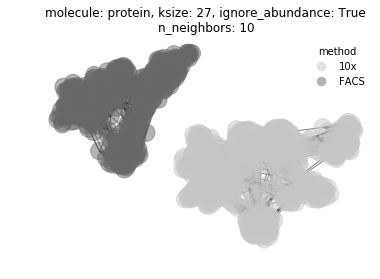

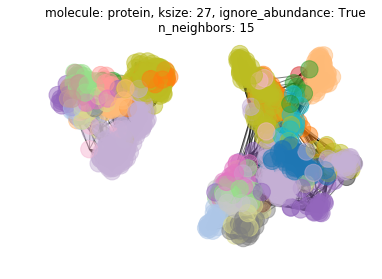

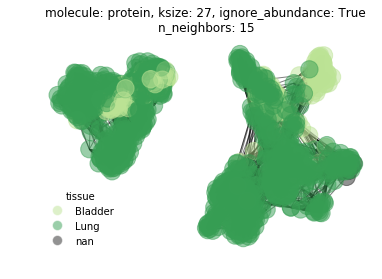

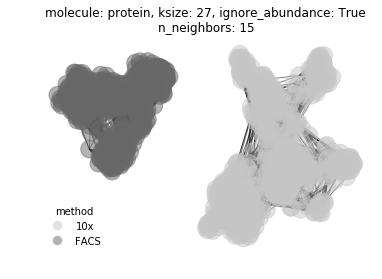

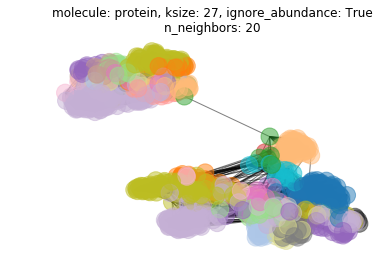

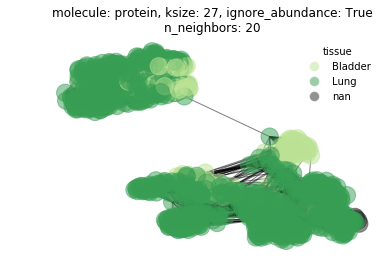

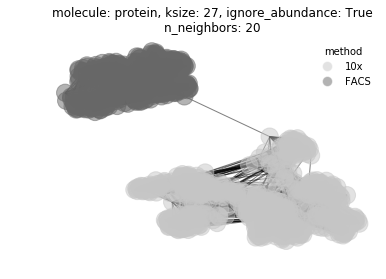

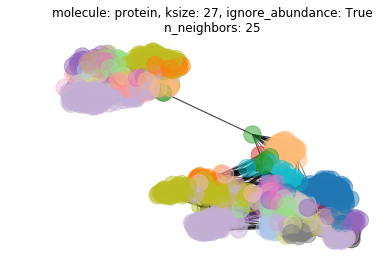

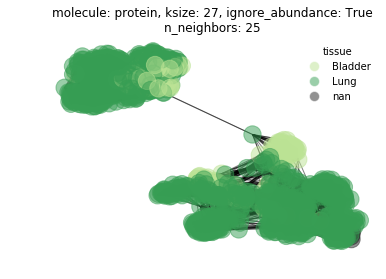

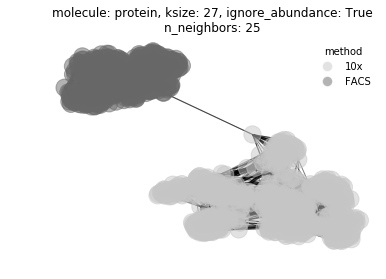

In [8]:
import itertools

import networkx as nx
import matplotlib.pyplot as plt

import knn

ksizes = 27,#, 33, 51
molecules = 'dna', 'protein'
ignore_abundances = True,# False
n_neighborss = 5, 10, 15, 20, 25


iterator = itertools.product(ksizes, molecules, ignore_abundances, n_neighborss)



s3_prefix = 's3://olgabot-maca/10x_vs_facs/sourmash_compare/'
basename_prefix = 'tenx=Bladder-Lung_facs=Bladder-Lung_'

name_template = 'molecule={molecule}_ksize={ksize}_ignore-abundance={ignore_abundance}'
csv_template = f'{s3_prefix}{basename_prefix}{name_template}.csv'
pdf_template = f'{figure_folder}/bladder_lung_facs_10x_{name_template}' + '_n-neighbors={n_neighbors}_label-color={label}'

palettes = dict(tissue='YlGn', cell_ontology_class='tab20', method='Greys')
color_cols = ['cell_ontology_class', 'tissue', 'method']


with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    for ksize, molecule, ignore_abundance, n_neighbors in iterator:
        title = f'molecule: {molecule}, ksize: {ksize}, ignore_abundance: {ignore_abundance}\nn_neighbors: {n_neighbors}'

        csv = csv_template.format(ksize=ksize, molecule=molecule, ignore_abundance=ignore_abundance)


        data, metadata = sourmash_utils.read_compare(csv)

        bladder_lung_facs_10x = knn.nearest_neighbor_graph(data, metadata, n_neighbors=n_neighbors,
                                                       color_cols=color_cols, palettes=palettes)

        pos = nx.spring_layout(bladder_lung_facs_10x, seed=0)

        for label in color_cols:
            fig, ax = plt.subplots()
            
            legend = label != 'cell_ontology_class'
            knn.draw_graph(bladder_lung_facs_10x, edge_color='black', pos=pos, label_col=label, legend=legend)
            ax.set(title=title)
            pdf = pdf_template.format(n_neighbors=n_neighbors, label=label, ksize=ksize, 
                                      molecule=molecule, ignore_abundance=ignore_abundance)
            fig.savefig(pdf)


In [25]:
# import itertools

# import networkx as nx
# import matplotlib.pyplot as plt

# ksizes = 27,#, 33, 51
# molecules = 'dna', 'protein'
# ignore_abundances = True, False

# iterator = itertools.product(ksizes, molecules, ignore_abundances)



# s3_prefix = 's3://olgabot-maca/10x_vs_facs/sourmash_compare/'
# basename_prefix = 'tenx=Bladder-Lung_facs=Bladder-Lung_'
# csv_template = s3_prefix + basename_prefix + 'molecule={molecule}_ksize={ksize}_ignore-abundance={ignore_abundance}.csv'


# palettes = dict(tissue='YlGn', cell_ontology_class='tab20', method='Greys')
# color_cols = ['cell_ontology_class', 'tissue', 'method']


# for ksize, molecule, ignore_abundance in iterator:
#     title = f'molecule: {molecule}, ksize: {ksize}, ignore_abundance: {ignore_abundance}'
    
#     csv = csv_template.format(ksize=ksize, molecule=molecule, ignore_abundance=ignore_abundance)


#     data, metadata = sourmash_utils.read_compare(csv)

#     bladder_lung_facs_10x = knn.nearest_neighbor_graph(data, metadata, 
#                                                    color_cols=color_cols, palettes=palettes)

#     pos = nx.spring_layout(bladder_lung_facs_10x, seed=0)

#     fig, ax = plt.subplots()
#     knn.draw_graph(bladder_lung_facs_10x, edge_color='black', pos=pos)
#     ax.set(title=title)
    
    
#     fig, ax = plt.subplots()
#     knn.draw_graph(bladder_lung_facs_10x, color_col='tissue_color', edge_color='black', pos=pos)
#     ax.set(title=title)
    
#     fig, ax = plt.subplots()
#     knn.draw_graph(bladder_lung_facs_10x, color_col='method_color', edge_color='black', pos=pos, 
#                label='legend')
#     ax.set(title=title)

In [ ]:
prefix = '/mnt/data/10X_P4_3/sourmash_compare/'
basename = 'possorted_genome_bam__k27_dna_ignore-abundance=False.csv'
csv = f'{prefix}{basename}'
bladder_abundance, bladder_abundance_metadata = sourmash_utils.read_compare(csv)



bladder_abundance_graph = nearest_neighbor_graph(bladder_abundance, bladder_abundance_metadata)

bladder_abundance_graph_pos = nx.spring_layout(bladder_abundance_graph, seed=0)

draw_graph(bladder_abundance_graph, pos=bladder_abundance_graph_pos)

In [ ]:
bladder_cell_abundance = sourmash_utils.get_single_cell(
    sourmash_utils.BLADDER_CELL_ID, bladder_abundance,
                              bladder_abundance_metadata, name='bladder_dna_k27_ignore',
                              ksize=27, ignore_abundance=True)
bladder_cell_abundance.head(10)

In [ ]:
prefix = '/mnt/data/10X_P4_3/sourmash_compare/'
basename = 'possorted_genome_bam__k27_protein_ignore-abundance=False.csv'
csv = f'{prefix}{basename}'
bladder_abundance, bladder_abundance_metadata = sourmash_utils.read_compare(csv)



bladder_abundance_graph = nearest_neighbor_graph(bladder_abundance, bladder_abundance_metadata)

bladder_abundance_graph_pos = nx.spring_layout(bladder_abundance_graph, seed=0)


draw_graph(bladder_abundance_graph, pos=bladder_abundance_graph_pos)

In [ ]:
prefix = '/mnt/data/10X_P4_3/sourmash_compare/'
basename = 'possorted_genome_bam__k27_protein_ignore-abundance=True.csv'
csv = f'{prefix}{basename}'
bladder_abundance, bladder_abundance_metadata = sourmash_utils.read_compare(csv)

bladder_abundance_graph = nearest_neighbor_graph(bladder_abundance, bladder_abundance_metadata)
bladder_abundance_graph_pos = nx.spring_layout(bladder_abundance_graph, seed=0)
draw_graph(bladder_abundance_graph, pos=bladder_abundance_graph_pos)

In [ ]:
import itertools


import matplotlib.pyplot as plt

ksizes = 21, 27, 33, 51
molecules = 'dna', 'protein'
ignore_abundances = True, False

iterator = itertools.product(ksizes, molecules, ignore_abundances)

for ksize, molecule, ignore_abundance in iterator:
    prefix = '/mnt/data/10X_P4_3/sourmash_compare/'
    basename = f'possorted_genome_bam__k{ksize}_{molecule}_ignore-abundance={ignore_abundance}.csv'
    csv = f'{prefix}{basename}'

    bladder_abundance, bladder_abundance_metadata = sourmash_utils.read_compare(csv)

    bladder_abundance_graph = nearest_neighbor_graph(bladder_abundance, bladder_abundance_metadata)
    bladder_abundance_graph_pos = nx.spring_layout(bladder_abundance_graph, seed=0)
    
    
    
    fig, ax = plt.subplots()
    draw_graph(bladder_abundance_graph, pos=bladder_abundance_graph_pos)
    ax = plt.gca()
    
    title = f'ksize: {ksize}, {molecule}, ignore_abundance: {ignore_abundance}'
    ax.set(title=title)
    fig.savefig()

In [ ]:
prefix = '/mnt/data/10X_P4_3/sourmash_compare/'
basename = 'possorted_genome_bam__k21_protein_ignore-abundance=True.csv'
csv = f'{prefix}{basename}'
bladder_abundance, bladder_abundance_metadata = sourmash_utils.read_compare(csv)

bladder_abundance_graph = nearest_neighbor_graph(bladder_abundance, bladder_abundance_metadata)
bladder_abundance_graph_pos = nx.spring_layout(bladder_abundance_graph, seed=0)
draw_graph(bladder_abundance_graph, pos=bladder_abundance_graph_pos)